In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

Data Exploration

In [ ]:
disaster_type = pd.read_csv("disaster_type_data.csv")

In [ ]:
disaster_type.head()

,Disaster Type,Country,Region,Magnitude,Magnitude Scale,Latitude,Longitude,Start Year,Start Month,Start Day
0,Drought,Djibouti,Africa,200.0,Km2,18.55,54.6865,2001,6.0,15.0
1,Drought,Sudan,Africa,200.0,Km2,18.55,54.6865,2000,1.0,15.0
2,Drought,Somalia,Africa,200.0,Km2,18.55,54.6865,2000,1.0,15.0
3,Flood,Angola,Africa,47000.0,Km2,18.55,54.6865,2000,1.0,8.0
4,Extreme temperature,Bangladesh,Asia,6.4,°C,18.55,54.6865,2000,1.0,15.0


In [ ]:
disaster_type.columns

Index(['Disaster Type', 'Country', 'Region', 'Magnitude', 'Magnitude Scale',
       'Latitude', 'Longitude', 'Start Year', 'Start Month', 'Start Day'],
      dtype='object')

In [ ]:
disaster_type.shape

(10276, 10)

In [ ]:
disaster_type.isnull().sum()

,0
Disaster Type,0
Country,0
Region,0
Magnitude,0
Magnitude Scale,0
Latitude,0
Longitude,0
Start Year,0
Start Month,0
Start Day,0


In [ ]:
disaster_type.dtypes

,0
Disaster Type,object
Country,object
Region,object
Magnitude,float64
Magnitude Scale,object
Latitude,float64
Longitude,float64
Start Year,int64
Start Month,float64
Start Day,float64


In [ ]:
# disaster_type = disaster_type.drop_duplicates(subset=['Disaster Type'])  # Keeps first occurrence


In [ ]:
disaster_type.duplicated().sum()

np.int64(50)

In [ ]:
print(disaster_type.describe)

<bound method NDFrame.describe of              Disaster Type     Country  Region  Magnitude Magnitude Scale  \
0                  Drought    Djibouti  Africa      200.0             Km2   
1                  Drought       Sudan  Africa      200.0             Km2   
2                  Drought     Somalia  Africa      200.0             Km2   
3                    Flood      Angola  Africa    47000.0             Km2   
4      Extreme temperature  Bangladesh    Asia        6.4              °C   
...                    ...         ...     ...        ...             ...   
10271                Storm  Madagascar  Africa      140.0             Kph   
10272                Storm  Madagascar  Africa      200.0             Kph   
10273                Storm  Mozambique  Africa      195.0             Kph   
10274                Storm      Malawi  Africa      200.0             Kph   
10275              Drought     Somalia  Africa      200.0             Km2   

       Latitude  Longitude  Start Year  S

In [ ]:
disaster_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10276 entries, 0 to 10275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Disaster Type    10276 non-null  object 
 1   Country          10276 non-null  object 
 2   Region           10276 non-null  object 
 3   Magnitude        10276 non-null  float64
 4   Magnitude Scale  10276 non-null  object 
 5   Latitude         10276 non-null  float64
 6   Longitude        10276 non-null  float64
 7   Start Year       10276 non-null  int64  
 8   Start Month      10276 non-null  float64
 9   Start Day        10276 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 802.9+ KB


Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Create a copy to avoid modifying the original
disaster_type_encoded = disaster_type.copy()

# Label Encoding for target and high-cardinality categorical columns
label_cols = ['Disaster Type', 'Country', 'Region','Magnitude Scale']
label_encoders = {}

for col in label_cols:
    le = LabelEncoder()
    disaster_type_encoded[col] = le.fit_transform(disaster_type_encoded[col].astype(str))
    label_encoders[col] = le  # Store encoders for inverse transformation if needed

# # One-Hot Encoding for categorical columns with fewer unique values
# one_hot_cols = ['Subregion', 'Region']
# disaster_type_encoded = pd.get_dummies(disaster_type_encoded, columns=one_hot_cols)

# Display the transformed dataset
print(disaster_type_encoded.head())

   Disaster Type  Country  Region  Magnitude  Magnitude Scale  Latitude  \
0              1       54       0      200.0                0     18.55   
1              1      186       0      200.0                0     18.55   
2              1      180       0      200.0                0     18.55   
3              5        4       0    47000.0                0     18.55   
4              4       13       2        6.4                4     18.55   

   Longitude  Start Year  Start Month  Start Day  
0    54.6865        2001          6.0       15.0  
1    54.6865        2000          1.0       15.0  
2    54.6865        2000          1.0       15.0  
3    54.6865        2000          1.0        8.0  
4    54.6865        2000          1.0       15.0  


use "disaster_type_encoded" from now on

In [ ]:
disaster_type_encoded.head()

,Disaster Type,Country,Region,Magnitude,Magnitude Scale,Latitude,Longitude,Start Year,Start Month,Start Day
0,1,54,0,200.0,0,18.55,54.6865,2001,6.0,15.0
1,1,186,0,200.0,0,18.55,54.6865,2000,1.0,15.0
2,1,180,0,200.0,0,18.55,54.6865,2000,1.0,15.0
3,5,4,0,47000.0,0,18.55,54.6865,2000,1.0,8.0
4,4,13,2,6.4,4,18.55,54.6865,2000,1.0,15.0


In [ ]:
# Save the encoded dataset
disaster_type_encoded.to_csv("encoded_disaster_data.csv", index=False)
print("Encoded dataset saved successfully!")

Encoded dataset saved successfully!


In [ ]:
import pickle

# Save the label encoders
with open("label_encoders.pkl", "wb") as f:
    pickle.dump(label_encoders, f)

print("Label encoders saved successfully!")

Label encoders saved successfully!


In [ ]:
disaster_type_encoded.shape

(10276, 10)

In [ ]:
disaster_type_encoded.isnull().sum()

,0
Disaster Type,0
Country,0
Region,0
Magnitude,0
Magnitude Scale,0
Latitude,0
Longitude,0
Start Year,0
Start Month,0
Start Day,0


In [ ]:
disaster_type_encoded.columns

Index(['Disaster Type', 'Country', 'Region', 'Magnitude', 'Magnitude Scale',
       'Latitude', 'Longitude', 'Start Year', 'Start Month', 'Start Day'],
      dtype='object')

In [ ]:
disaster_type_encoded.dtypes

,0
Disaster Type,int64
Country,int64
Region,int64
Magnitude,float64
Magnitude Scale,int64
Latitude,float64
Longitude,float64
Start Year,int64
Start Month,float64
Start Day,float64


In [ ]:
disaster_type_encoded.describe()


,Disaster Type,Country,Region,Magnitude,Magnitude Scale,Latitude,Longitude,Start Year,Start Month,Start Day
count,10276.000000,10276.000000,10276.000000,1.027600e+04,10276.000000,10276.000000,10276.000000,10276.000000,10276.000000,10276.000000
mean,6.565103,108.920008,1.547197,1.595950e+04,0.729661,18.169856,52.515310,2011.800701,6.415337,15.111327
std,3.516211,65.800979,1.072919,1.605709e+05,1.102132,9.190017,32.072434,7.452923,3.375731,8.357025
min,0.000000,0.000000,0.000000,-5.700000e+01,0.000000,-72.640000,-172.095000,2000.000000,1.000000,1.000000
25%,5.000000,47.000000,1.000000,2.000000e+02,0.000000,18.550000,54.686500,2005.000000,4.000000,8.000000
50%,5.000000,97.000000,2.000000,2.000000e+02,0.000000,18.550000,54.686500,2011.000000,7.000000,15.000000
75%,11.000000,158.000000,2.000000,2.000000e+02,1.000000,18.550000,54.686500,2019.000000,9.000000,22.000000
max,13.000000,219.000000,4.000000,1.302587e+07,4.000000,67.930000,179.650000,2025.000000,12.000000,31.000000


In [ ]:
disaster_type_encoded.shape

(10276, 10)

In [ ]:
print(disaster_type_encoded.duplicated().sum())  # Count duplicate rows

50


In [ ]:
disaster_type_encoded = disaster_type_encoded.drop_duplicates().reset_index(drop=True)


In [ ]:
print(disaster_type_encoded.duplicated().sum())  # Count duplicate rows


0


In [ ]:
disaster_type_encoded.shape

(10226, 10)

In [ ]:
disaster_type_encoded.head()

,Disaster Type,Country,Region,Magnitude,Magnitude Scale,Latitude,Longitude,Start Year,Start Month,Start Day
0,1,54,0,200.0,0,18.55,54.6865,2001,6.0,15.0
1,1,186,0,200.0,0,18.55,54.6865,2000,1.0,15.0
2,1,180,0,200.0,0,18.55,54.6865,2000,1.0,15.0
3,5,4,0,47000.0,0,18.55,54.6865,2000,1.0,8.0
4,4,13,2,6.4,4,18.55,54.6865,2000,1.0,15.0


Visualizations

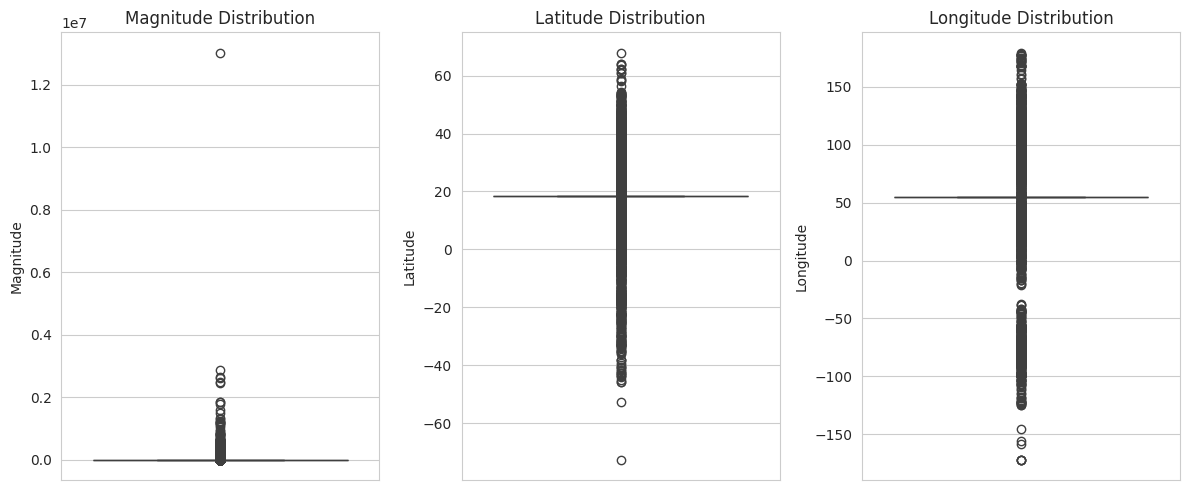

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ["Magnitude", "Latitude", "Longitude"]

plt.figure(figsize=(12, 5))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=disaster_type_encoded[col])
    plt.title(f"{col} Distribution")

plt.tight_layout()
plt.show()


In [ ]:
disaster_type_encoded.shape

(10226, 10)

In [ ]:
disaster_type_encoded = disaster_type_encoded[(disaster_type_encoded["Magnitude"] > 0) & (disaster_type_encoded["Magnitude"] < 1e6)]


In [ ]:
lat_lon_counts = disaster_type_encoded.groupby(["Latitude", "Longitude"]).size().reset_index(name="count")
lat_lon_counts = lat_lon_counts.sort_values(by="count", ascending=False)
print(lat_lon_counts.head(10))  # Show most common lat/lon pairs


      Latitude  Longitude  count
806     18.550    54.6865   8282
454      3.295    95.9820     12
369     -1.467   -78.4420      7
627     10.980   -85.4400      6
700     14.620   -83.6400      5
668     13.257   123.6850      5
691     14.420    -1.0200      4
802     18.530   -70.0600      4
701     14.640   -61.0200      4
1033    27.730    88.1550      4


In [ ]:
disaster_type_encoded = disaster_type_encoded[~((disaster_type_encoded["Latitude"] == 18.55) & (disaster_type_encoded["Longitude"] == 54.6865))]

In [ ]:
lat_lon_counts = disaster_type_encoded.groupby(["Latitude", "Longitude"]).size().reset_index(name="count")
lat_lon_counts = lat_lon_counts.sort_values(by="count", ascending=False)
print(lat_lon_counts.head(10))  # Show most common lat/lon pairs

      Latitude  Longitude  count
454      3.295     95.982     12
369     -1.467    -78.442      7
627     10.980    -85.440      6
668     13.257    123.685      5
700     14.620    -83.640      5
691     14.420     -1.020      4
1032    27.730     88.155      4
802     18.530    -70.060      4
161    -15.489   -172.095      4
701     14.640    -61.020      4


In [ ]:
disaster_type_encoded.shape

(1800, 10)

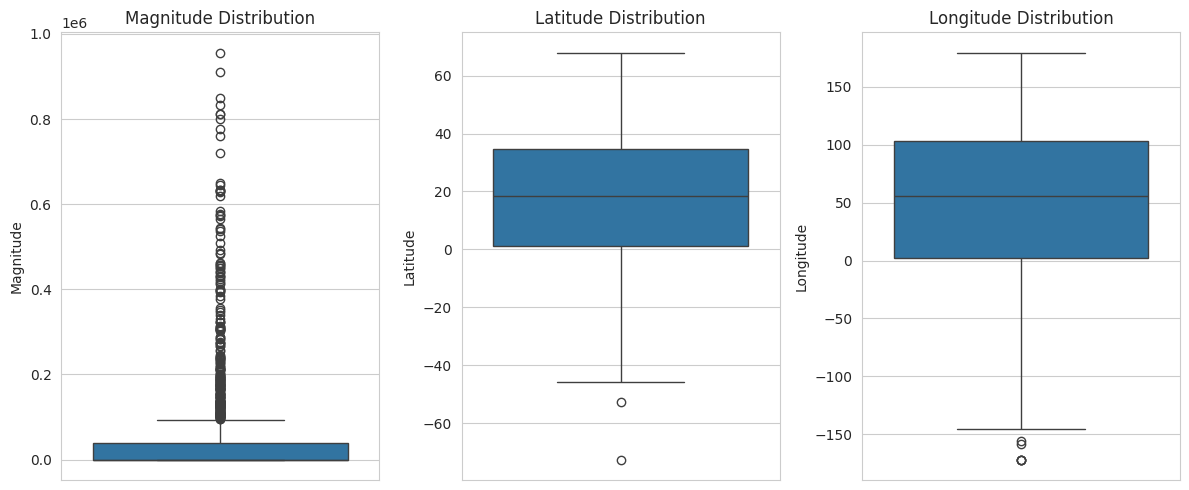

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ["Magnitude", "Latitude", "Longitude"]

plt.figure(figsize=(12, 5))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=disaster_type_encoded[col])
    plt.title(f"{col} Distribution")

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

# Define function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal
cleaned_data = disaster_type_encoded.copy()
for col in ["Magnitude", "Latitude", "Longitude"]:
    cleaned_data = remove_outliers_iqr(cleaned_data, col)

# Print shape before and after
print("Before outlier removal:", disaster_type_encoded.shape)
print("After outlier removal:", cleaned_data.shape)


Before outlier removal: (1800, 10)
After outlier removal: (1544, 10)


use "cleaned_data" from now on

In [ ]:
# Save the encoded dataset
cleaned_data.to_csv("cleaned_no_outliers_data.csv", index=False)
print("Cleaned dataset after outlier removal saved successfully!")

Cleaned dataset after outlier removal saved successfully!


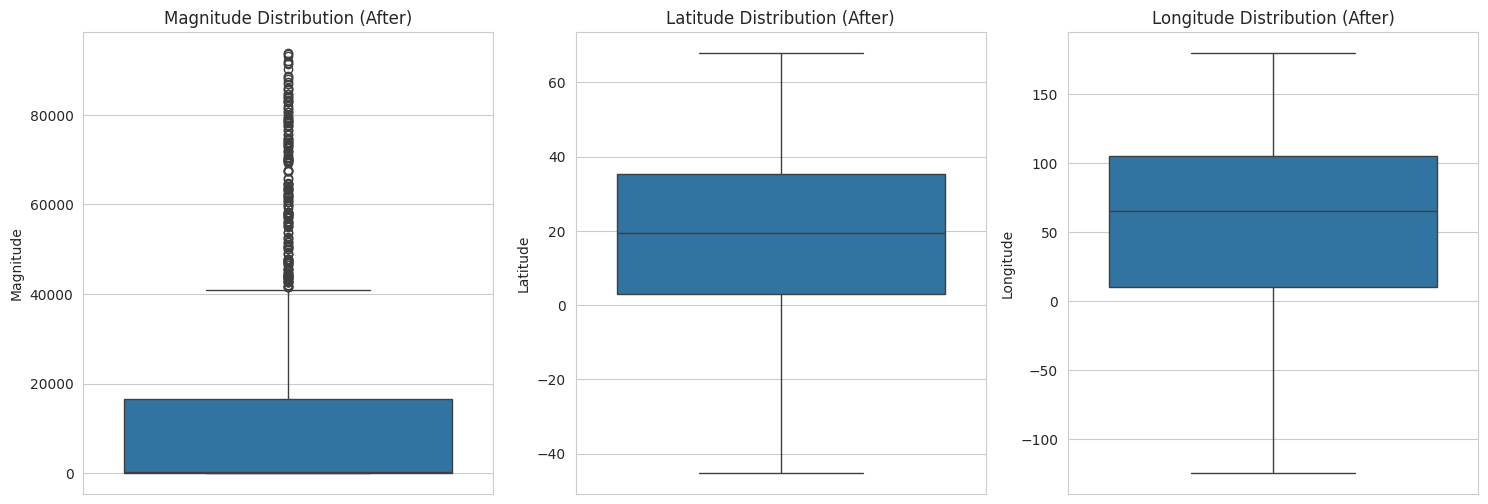

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot distributions after handling outliers
sns.boxplot(y=cleaned_data["Magnitude"], ax=axes[0])
axes[0].set_title("Magnitude Distribution (After)")

sns.boxplot(y=cleaned_data["Latitude"], ax=axes[1])
axes[1].set_title("Latitude Distribution (After)")

sns.boxplot(y=cleaned_data["Longitude"], ax=axes[2])
axes[2].set_title("Longitude Distribution (After)")

# Show plots
plt.show()


iqr

In [ ]:
import numpy as np

Q1 = cleaned_data["Magnitude"].quantile(0.25)
Q3 = cleaned_data["Magnitude"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

remaining_outliers = cleaned_data[(cleaned_data["Magnitude"] > upper_bound)]
print("Remaining outliers in Magnitude:", remaining_outliers.shape[0])

Remaining outliers in Magnitude: 182


In [ ]:
cleaned_data.columns

Index(['Disaster Type', 'Country', 'Region', 'Magnitude', 'Magnitude Scale',
       'Latitude', 'Longitude', 'Start Year', 'Start Month', 'Start Day'],
      dtype='object')

plots

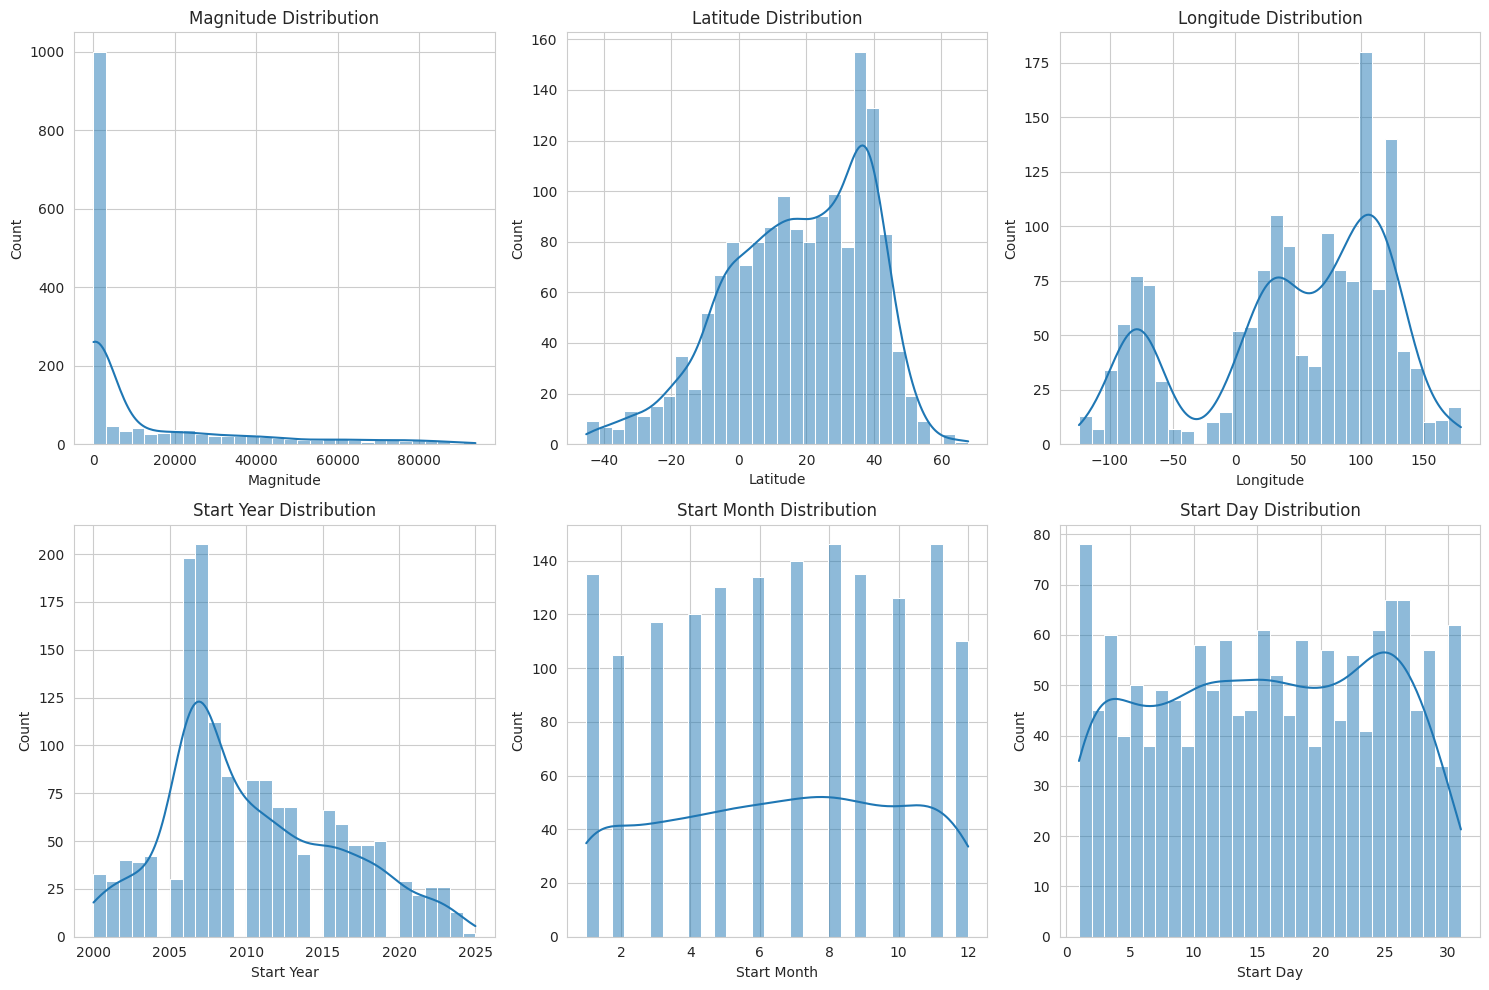

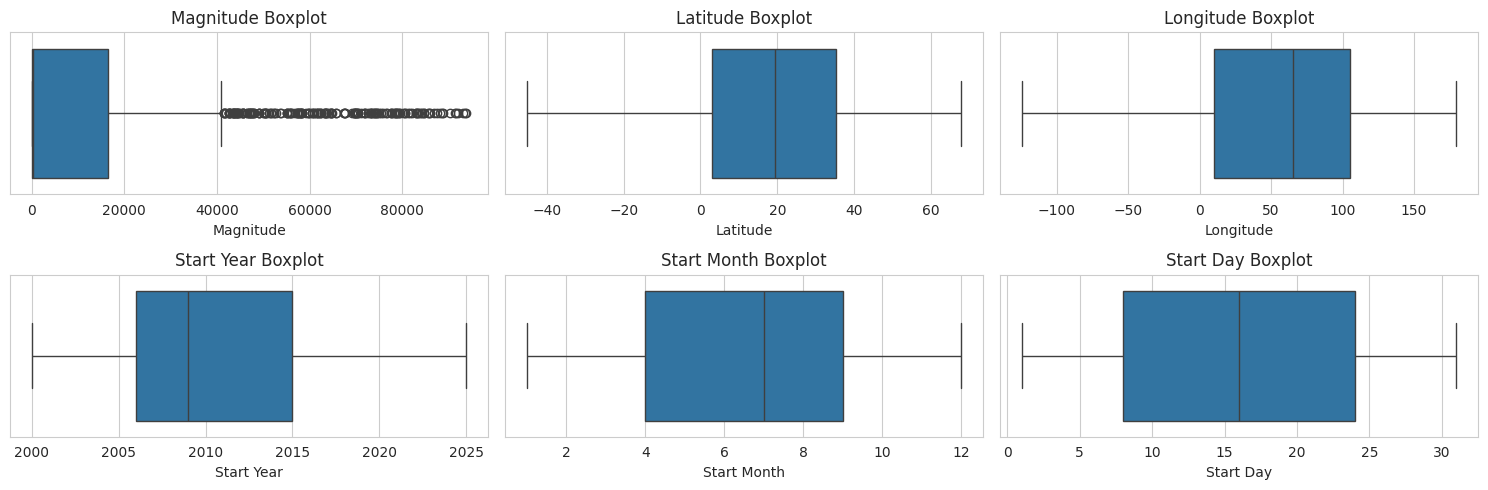

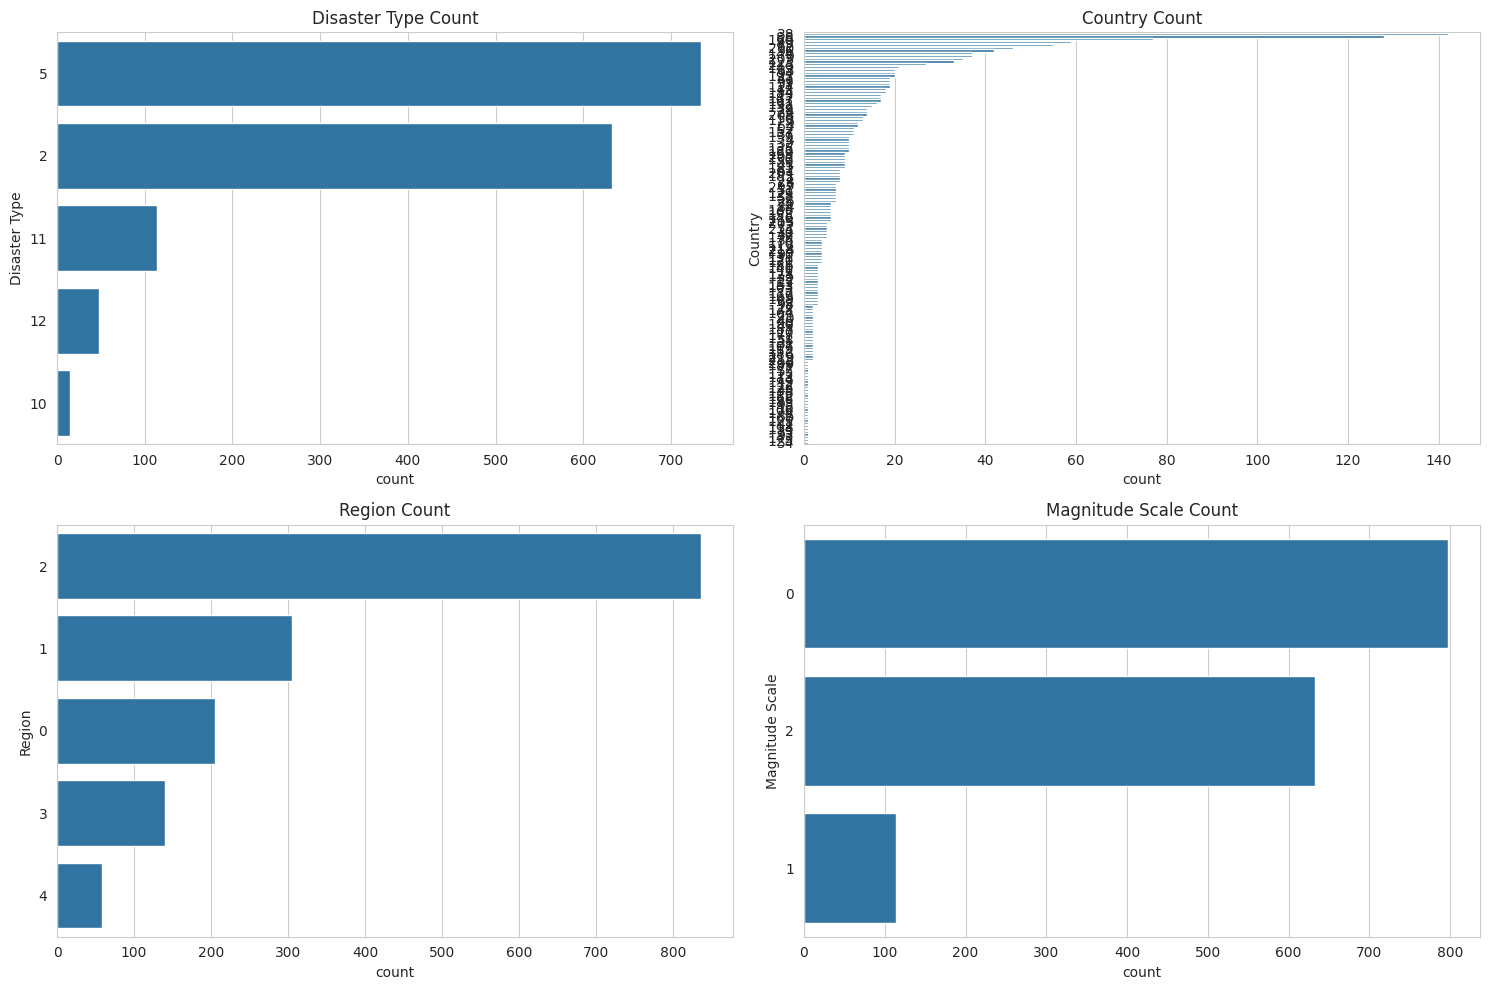

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set_style("whitegrid")

# Define numerical and categorical features
num_features = ["Magnitude", "Latitude", "Longitude", "Start Year", "Start Month", "Start Day"]
cat_features = ["Disaster Type", "Country", "Region", "Magnitude Scale"]

# --- Histograms & KDE ---
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_features):
    plt.subplot(2, 3, i+1)
    sns.histplot(cleaned_data[col], kde=True, bins=30)
    plt.title(f"{col} Distribution")
plt.tight_layout()
plt.show()

# --- Boxplots ---
plt.figure(figsize=(15, 5))
for i, col in enumerate(num_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=cleaned_data[col])
    plt.title(f"{col} Boxplot")
plt.tight_layout()
plt.show()

# --- Countplots for Categorical Features ---
plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_features):
    plt.subplot(2, 2, i+1)
    sns.countplot(y=cleaned_data[col], order=cleaned_data[col].value_counts().index)
    plt.title(f"{col} Count")
plt.tight_layout()
plt.show()

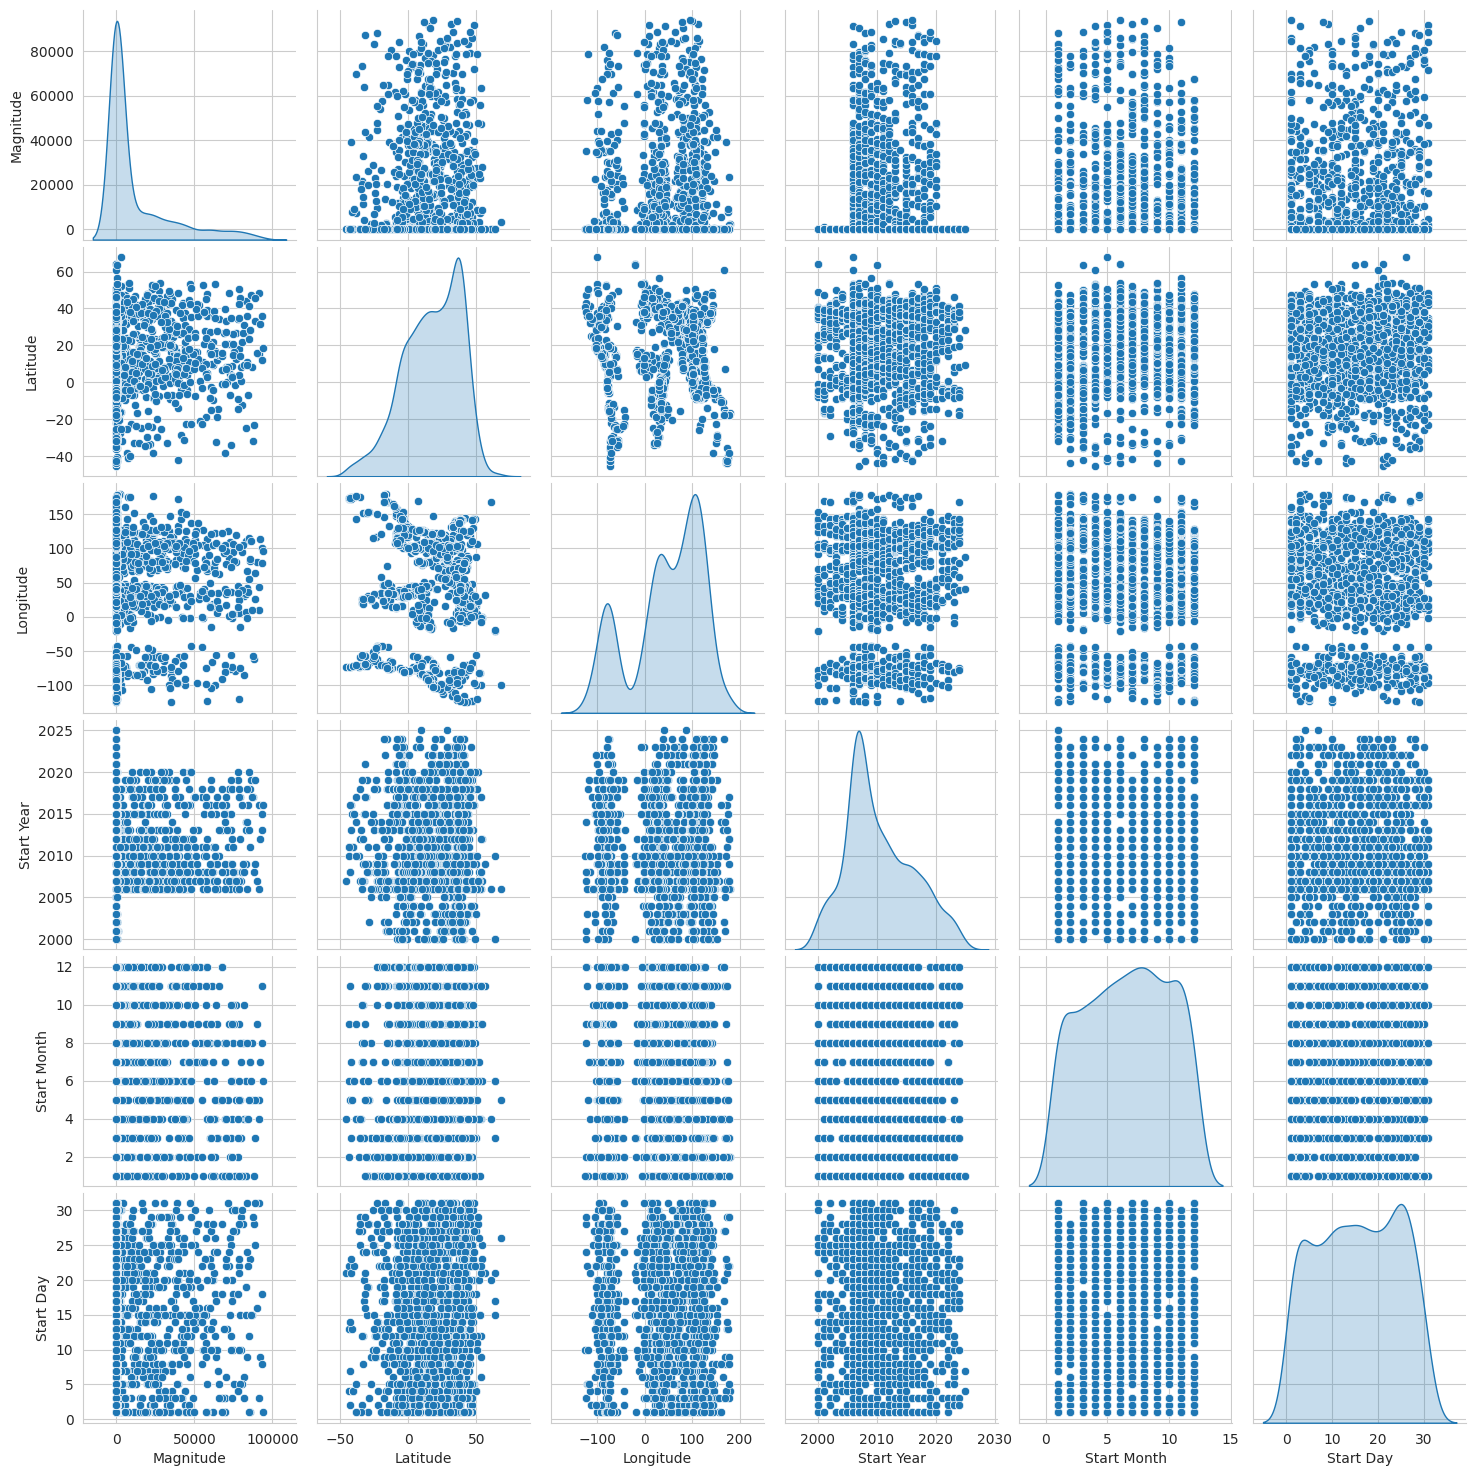

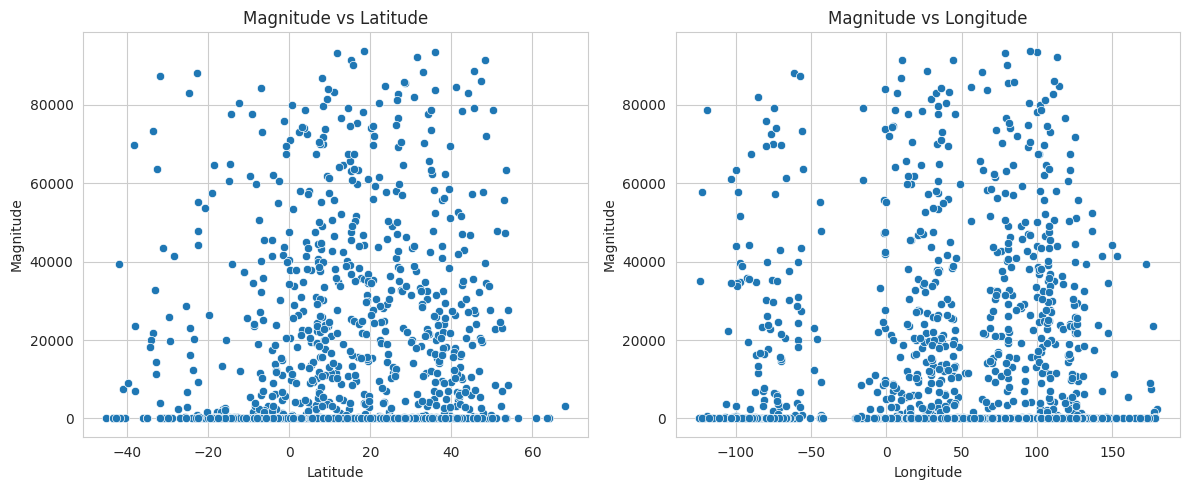

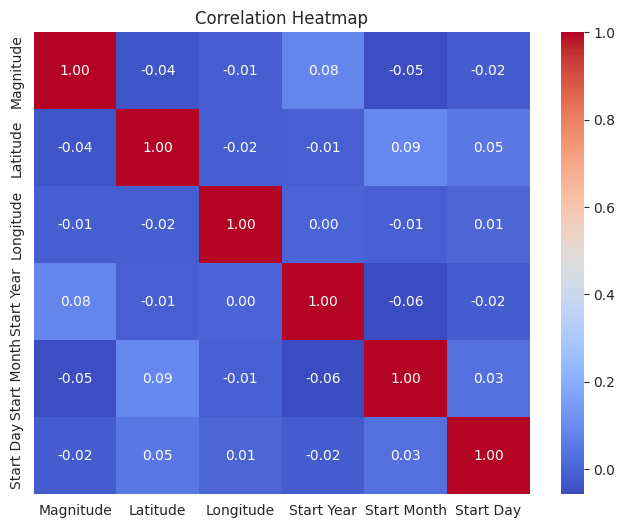

In [ ]:
# --- Pairplot (Relationships between Numerical Variables) ---
sns.pairplot(cleaned_data[num_features], diag_kind='kde')
plt.show()

# --- Scatter Plots (Magnitude vs Lat/Lon) ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=cleaned_data["Latitude"], y=cleaned_data["Magnitude"])
plt.title("Magnitude vs Latitude")

plt.subplot(1, 2, 2)
sns.scatterplot(x=cleaned_data["Longitude"], y=cleaned_data["Magnitude"])
plt.title("Magnitude vs Longitude")

plt.tight_layout()
plt.show()

# --- Correlation Heatmap ---
plt.figure(figsize=(8, 6))
sns.heatmap(cleaned_data[num_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

StandardScaler - Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Selecting numerical columns
num_cols = ['Magnitude', 'Latitude', 'Longitude']

# Applying StandardScaler
scaler = StandardScaler()
cleaned_data[num_cols] = scaler.fit_transform(cleaned_data[num_cols])

print("Feature scaling applied successfully!")

Feature scaling applied successfully!


In [ ]:
import pickle

# Save the fitted StandardScaler
with open("scaler.pkl", "wb") as s:
    pickle.dump(scaler, s)
print("Feature scaling saved in scaler.pkl file!")

Feature scaling saved in scaler.pkl file!


In [ ]:
cleaned_data.columns

Index(['Disaster Type', 'Country', 'Region', 'Magnitude', 'Magnitude Scale',
       'Latitude', 'Longitude', 'Start Year', 'Start Month', 'Start Day'],
      dtype='object')

In [ ]:
cleaned_data.shape

(1544, 10)

random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Define features (X) and target variable (y)
X = cleaned_data.drop(columns=['Disaster Type'])  # Drop target column
y = cleaned_data['Disaster Type']  # Target variable

In [ ]:
# Convert categorical columns to numerical (One-Hot Encoding)
X = pd.get_dummies(X)

# Split data into training & testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:

# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9838187702265372
Classification Report:
               precision    recall  f1-score   support

           2       1.00      1.00      1.00       126
           5       0.97      1.00      0.98       155
          10       1.00      0.33      0.50         3
          11       1.00      1.00      1.00        17
          12       1.00      0.62      0.77         8

    accuracy                           0.98       309
   macro avg       0.99      0.79      0.85       309
weighted avg       0.98      0.98      0.98       309



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

In [ ]:
# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(100, 500, 50),  # More trees
    'max_depth': [None, 10, 20, 30, 40, 50],  # Different depth limits
    'min_samples_split': np.arange(2, 10, 2),  # Minimum samples required to split
    'min_samples_leaf': np.arange(1, 10, 2),  # Minimum samples per leaf
    'max_features': ['sqrt', 'log2', None],  # Feature selection
    'bootstrap': [True, False]  # Sampling method
}

In [ ]:
# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

In [ ]:
# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=50,  # Number of different parameter combinations to try
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1,  # Use all available cores
    random_state=42
)

In [ ]:
# Fit the model with hyperparameter tuning
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': array([1, 3, 5, 7, 9]),
                                        'min_samples_split': array([2, 4, 6, 8]),
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450])},
                   random_state=42, scoring='accuracy', verbose=2)

In [ ]:
# Get the best model
best_rf = random_search.best_estimator_

In [ ]:
# Evaluate performance
y_pred_best_rf = best_rf.predict(X_test)
best_rf_accuracy = accuracy_score(y_test, y_pred_best_rf)

In [ ]:
print("Optimized Random Forest Accuracy:", best_rf_accuracy)
print("Best Hyperparameters:", random_search.best_params_)

Optimized Random Forest Accuracy: 0.9870550161812298
Best Hyperparameters: {'n_estimators': np.int64(250), 'min_samples_split': np.int64(8), 'min_samples_leaf': np.int64(1), 'max_features': None, 'max_depth': 50, 'bootstrap': True}


model saved

In [ ]:
import pickle

# Save the trained model correctly
with open("disaster_type_model.pkl", "wb") as file:
    pickle.dump(model, file)
print("Model saved successfully as 'disaster_type_model.pkl'")

Model saved successfully as 'disaster_type_model.pkl'


In [ ]:
import numpy as np

# Save feature names along with the model
features_used = X_train.columns.to_list()  # Store the column names used in training

with open("features.pkl", "wb") as f:
    pickle.dump(features_used, f)

testing

In [ ]:
import pickle
import pandas as pd
import numpy as np

# Load Model
with open("disaster_type_model.pkl", "rb") as file:
    model = pickle.load(file)

# Load Feature Names
with open("features.pkl", "rb") as f:
    train_features = pickle.load(f)

# Load Standard Scaler
with open("scaler.pkl", "rb") as s:
    scaler = pickle.load(s)

# Load Label Encoders (if categorical encoding was applied)
with open("label_encoders.pkl", "rb") as le_file:
    label_encoders = pickle.load(le_file)

# Sample Test Data (Ensure it matches training features)
test_data = pd.DataFrame({
    'Magnitude': [5.2],
    'Latitude': [34.05],
    'Longitude': [-118.24],
    'Start Year': [2022],
    'Start Month': [6],
    'Start Day': [12],
    'Country_USA': [1],
    'Region_North America': [1],
    'Magnitude Scale_Richter': [1]
})

In [ ]:
# Scale numerical features
test_data[['Magnitude', 'Latitude', 'Longitude']] = scaler.transform(test_data[['Magnitude', 'Latitude', 'Longitude']])

In [ ]:
# Ensure test data matches the model's expected features
test_data = test_data.reindex(columns=train_features, fill_value=0)

In [ ]:
# Predict
predicted_disaster = model.predict(test_data)

In [ ]:
# Decode Prediction (if needed)
predicted_disaster = label_encoders['Disaster Type'].inverse_transform(predicted_disaster)

In [ ]:
# Output
print("Predicted Disaster Type:", predicted_disaster[0])

Predicted Disaster Type: Earthquake


In [ ]:
import pandas as pd
import joblib

# Load the trained model
with open("disaster_type_model.pkl", "rb") as file:
    model = joblib.load(file)

# Load the feature names used in training
with open("features.pkl", "rb") as f:
    train_features = joblib.load(f)

# Load all Label Encoders
with open("label_encoders.pkl", "rb") as le_file:
    label_encoders = joblib.load(le_file)

# Extract the LabelEncoder for "Disaster Type"
disaster_label_encoder = label_encoders["Disaster Type"]  # Ensure the key matches your training script

# Sample Test Data
test_data = pd.DataFrame([
    {'Magnitude': 200, 'Latitude': 14.381, 'Longitude': -90.601, 'Start Year': 2000, 'Start Month': 1, 'Start Day': 16,}
])

# Ensure test data matches model's expected feature set
test_data = test_data.reindex(columns=train_features, fill_value=0)

# Predict using the trained model
predicted_labels = model.predict(test_data)

# Convert numerical label to disaster name
predicted_disasters = disaster_label_encoder.inverse_transform(predicted_labels)

# Output predictions
for i, disaster in enumerate(predicted_disasters):
    print(f"Test Case {i+1}: Predicted Disaster Type - {disaster}")


Test Case 1: Predicted Disaster Type - Flood


In [ ]:
import pandas as pd
import joblib

# Load the trained model
with open("disaster_type_model.pkl", "rb") as file:
    model = joblib.load(file)

# Load the feature names used in training
with open("features.pkl", "rb") as f:
    train_features = joblib.load(f)

# Load the Label Encoders
with open("label_encoders.pkl", "rb") as le_file:
    label_encoders = joblib.load(le_file)

# Load the correct LabelEncoder for Disaster Type
disaster_label_encoder = label_encoders.get("Disaster Type")  # Ensure correct column name

# Sample Test Data (Ensure it follows the encoded format)
test_data = pd.DataFrame([{
    'Magnitude': 200, 'Latitude': 14.381, 'Longitude': -90.601,
    'Start Year': 2000, 'Start Month': 1, 'Start Day': 16,
    'Country': 79, 'Region': 1, 'Magnitude Scale': 0
}])

# Ensure test data matches model's expected feature set
test_data = test_data.reindex(columns=train_features, fill_value=0)

# Predict using the trained model
predicted_labels = model.predict(test_data)

# Convert numerical label to disaster name
predicted_disasters = disaster_label_encoder.inverse_transform(predicted_labels)

# Output predictions
for i, disaster in enumerate(predicted_disasters):
    print(f"Test Case {i+1}: Predicted Disaster Type - {disaster}")


Test Case 1: Predicted Disaster Type - Flood


In [ ]:
print(dict(enumerate(disaster_label_encoder.classes_)))

{0: 'Animal incident', 1: 'Drought', 2: 'Earthquake', 3: 'Epidemic', 4: 'Extreme temperature', 5: 'Flood', 6: 'Glacial lake outburst flood', 7: 'Impact', 8: 'Infestation', 9: 'Mass movement (dry)', 10: 'Mass movement (wet)', 11: 'Storm', 12: 'Volcanic activity', 13: 'Wildfire'}


In [ ]:
print("Model Expected Features:", train_features)
print("Test Data Features:", test_data.columns.tolist())

Model Expected Features: ['Country', 'Region', 'Magnitude', 'Magnitude Scale', 'Latitude', 'Longitude', 'Start Year', 'Start Month', 'Start Day']
Test Data Features: ['Country', 'Region', 'Magnitude', 'Magnitude Scale', 'Latitude', 'Longitude', 'Start Year', 'Start Month', 'Start Day']


In [ ]:
import pandas as pd

df = pd.read_csv("cleaned_no_outliers_data.csv")  # Load your cleaned dataset
print(df.isnull().sum())  # Check if any column has missing values

Disaster Type      0
Country            0
Region             0
Magnitude          0
Magnitude Scale    0
Latitude           0
Longitude          0
Start Year         0
Start Month        0
Start Day          0
dtype: int64


In [ ]:
sample = df.sample(2)  # Pick a random row from training data
X_sample = sample.drop(columns=['Disaster Type'])  # Remove target column
y_sample = sample['Disaster Type']  # True disaster type

predicted_label = model.predict(X_sample)
predicted_disaster = disaster_label_encoder.inverse_transform(predicted_label)

print(f"True: {disaster_label_encoder.inverse_transform(y_sample)} | Predicted: {predicted_disaster}")

True: ['Flood' 'Flood'] | Predicted: ['Flood' 'Flood']


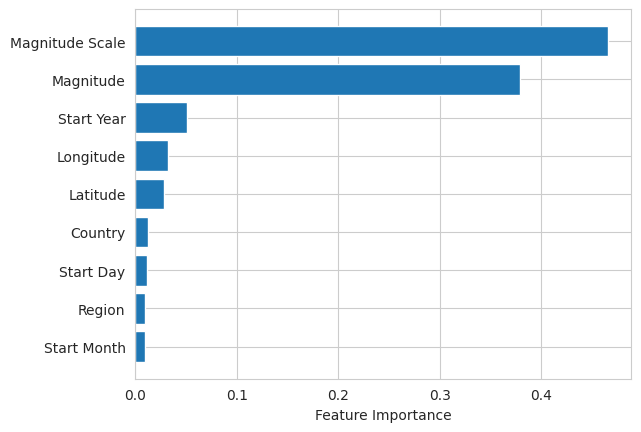

In [ ]:
import matplotlib.pyplot as plt

feature_importance = model.feature_importances_
sorted_idx = feature_importance.argsort()
plt.barh([train_features[i] for i in sorted_idx], feature_importance[sorted_idx])
plt.xlabel("Feature Importance")
plt.show()